<h3>Install Dependencies</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import seaborn as sns
from datetime import date
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
fake_job_postings_df = pd.read_csv("fake_job_postings.csv")
corona_patient_df = pd.read_csv("patient.csv")

print('\033[1m' + "---------------------------------------------- DATASET INFORMATION ----------------------------------------------" + '\033[0m')
print('\n\033[1m' + "Fake Job Postings Dataset" + '\033[0m')
print("Initial Number of attributes: %d" % len(fake_job_postings_df.columns))
print("Initial Number of samples: %d" % len(fake_job_postings_df))
print("Missing values of each attribute: \n\n", fake_job_postings_df.isnull().sum())
display(fake_job_postings_df.head())

print('\n\033[1m' + "Corona Patient Dataset" + '\033[0m')
print("Initial Number of attributes: %d" % len(corona_patient_df.columns))
print("Initial Number of samples: %d" % len(corona_patient_df))
print("Missing values of each attribute: \n\n", corona_patient_df.isnull().sum())
display(corona_patient_df)

---------------------------------------------- DATASET INFORMATION ----------------------------------------------

Fake Job Postings Dataset
Initial Number of attributes: 18
Initial Number of samples: 17880
Missing values of each attribute: 

 job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0



Corona Patient Dataset
Initial Number of attributes: 14
Initial Number of samples: 6285
Missing values of each attribute: 

 id                     1
sex                 5864
birth_year          5877
country                2
region              5876
group               6202
infection_reason    6139
infection_order     6250
infected_by         6215
contact_number      6235
confirmed_date         1
released_date       6247
deceased_date       6262
state                  1
dtype: int64


,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1.0,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2.0,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3.0,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4.0,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5.0,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6280,6281.0,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,NaN,isolated
6281,6282.0,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,NaN,isolated
6282,6283.0,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,NaN,isolated
6283,6284.0,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,NaN,isolated


Based on the dataframe above, we can tell which is the categorical and continuous variable.

<b>Fake Job Posting:</b> All variables are categorical / discrete, except for salary range.

<b>Corona Patient:</b> All variables are categorical / discrete.

In [3]:
# print("\n\n" + '\033[1m' + '------------------------------------- DESCRIPTIVE STATITIC INFORMATION -------------------------------------' + '\033[0m')
# print('\n\033[1m' + "                     Fake Job Postings Dataset" + '\033[0m')
# display(fake_job_postings_df.describe())
# print('\n\033[1m' + "                     Corona Patient Dataset" + '\033[0m')
# display(corona_patient_df.describe())

<h3 style="color:#db4d69">Target Variables / Label</h3>

Label of Fake Job Postings Dataset: <b>fraudulent</b> (1=True | 0=False)

Label of Corona Patient Data: <b>state</b> (Isolated | Released | Deceased)

<h3 style="color:#db4d69">Remove Unuseful Attributes</h3>

Since we know what we will predict (<b>fraudulent for fake job</b> and <b>state for corona patient</b>), we can intuitively tell which variable contributes the most and which variable surely has no contribution / relation at all in determining the label. For variable that has no contribution at all, we will drop them. Meanwhile, for variable that may be contribute, we will analyze them more using visualization tools (e.g. covariance matrix, hisogram, etc) and decide it later.

<b>Fake Job Posting's Unuseful Attribute:</b>
- job_id
- title (because it differs widely and has so many unique values, hence we can't tell or infer what job title that is often used for fraud)
- department (since it's similar with 'function' and 'function' have far less missing values than the 'department')

<b>Corona Patient's Unuseful Attribute:</b>
- id
- country (from Kaggle, we know that the values for attribute country is 100% Korea, so it's the same for each row)
- confirmed_date
- released_date
- deceased_date
- infection_order, infected_by, contact_number (too many missing values and even if replaced or transformed, it's still hard to gain infomation from it)

In [4]:
# Remove unuseful attributes
fake_job_postings_df.drop(["job_id", "title","department"], axis = 1, inplace = True)
corona_patient_df.drop(["id", "country", "confirmed_date", "released_date", "deceased_date","infection_order","infected_by","contact_number"], axis = 1, inplace = True)

display(fake_job_postings_df.head(2))
display(corona_patient_df.head(2))

,location,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,"US, NY, New York",NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,"NZ, , Auckland",NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


,sex,birth_year,region,group,infection_reason,state
0,female,1984.0,filtered at airport,NaN,visit to Wuhan,released
1,male,1964.0,filtered at airport,NaN,visit to Wuhan,released


<h3 style="color:#db4d69">Data Transformation</h3>
For 'birth year' colum in corona dataset, we will transform it to age and binning it to decades (20s, 30s, 40s, ....)

In [5]:
def calculate_age(born):
    today = date.today()
    return today.year - born

# Convert Pandas column containing NaNs to dtype `int`. Must use 'Int64', there's no NaN representation in 'int' format
corona_patient_df['birth_year'].replace('NaN', np.nan).astype('Int64')

# Calculate age
corona_patient_df['birth_year'] = corona_patient_df['birth_year'].apply(calculate_age)
corona_patient_df.rename({'birth_year':'age'}, axis='columns', inplace=True)
display(corona_patient_df)

# Binning
corona_patient_df['age'] = pd.cut(x=corona_patient_df['age'], bins=[20, 29, 39, 49, 59, 69, 79, 89], labels=['20s', '30s', '40s', '50s', '60s', '70s', '80s'])
display(corona_patient_df)

,sex,age,region,group,infection_reason,state
0,female,36.0,filtered at airport,NaN,visit to Wuhan,released
1,male,56.0,filtered at airport,NaN,visit to Wuhan,released
2,male,54.0,capital area,NaN,visit to Wuhan,released
3,male,56.0,capital area,NaN,visit to Wuhan,released
4,male,33.0,capital area,NaN,visit to Wuhan,released
...,...,...,...,...,...,...
6280,NaN,NaN,NaN,NaN,NaN,isolated
6281,NaN,NaN,NaN,NaN,NaN,isolated
6282,NaN,NaN,NaN,NaN,NaN,isolated
6283,NaN,NaN,NaN,NaN,NaN,isolated


,sex,age,region,group,infection_reason,state
0,female,30s,filtered at airport,NaN,visit to Wuhan,released
1,male,50s,filtered at airport,NaN,visit to Wuhan,released
2,male,50s,capital area,NaN,visit to Wuhan,released
3,male,50s,capital area,NaN,visit to Wuhan,released
4,male,30s,capital area,NaN,visit to Wuhan,released
...,...,...,...,...,...,...
6280,NaN,NaN,NaN,NaN,NaN,isolated
6281,NaN,NaN,NaN,NaN,NaN,isolated
6282,NaN,NaN,NaN,NaN,NaN,isolated
6283,NaN,NaN,NaN,NaN,NaN,isolated


<h3 style="color:#db4d69">Handling Missing Values and Noise</h3>

<b>Fake Job Postings Dataset</b>

For some attributes that need deeper algorithm to process them (<i>e.g text mining algorithm to process 'description' in Fake Jobs Posting Dataset</i>), we will convert the value into 1 (value is provided) and 0 (value isn't provided).

In [6]:
# Change column name so that more meaningful
col_name = {'company_profile': 'has_company_profile', 'description': 'has_description', 'requirements': 'has_requirements', 'benefits': 'has_benefits'}
fake_job_postings_df.rename(columns=col_name, inplace=True)

# Convert NaN to 0 (means that value isn't provided) 
fake_job_postings_df[list(col_name.values())] = fake_job_postings_df[list(col_name.values())].fillna(value=0)

# Convert Value (anything that is not a number, in this case 0) to 1 (means that value is provided)
for name in col_name.values():
    fake_job_postings_df[name] = pd.to_numeric(fake_job_postings_df[name], errors='coerce').fillna(value=1, downcast='infer')
fake_job_postings_df.head(2)

,location,salary_range,has_company_profile,has_description,has_requirements,has_benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,"US, NY, New York",NaN,1,1,1,0,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,"NZ, , Auckland",NaN,1,1,1,1,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


While for the other remaining attributes (categorical) that still contain Null, we will treat any missing values as 'missing value' or 'unavailable'. Thus, we won't drop them, but replace them with more meaningful name (new unique value).

In [7]:
fake_job_postings_df = fake_job_postings_df.fillna(value='Unprovided')
fake_job_postings_df.head(2)

,location,salary_range,has_company_profile,has_description,has_requirements,has_benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,"US, NY, New York",Unprovided,1,1,1,0,0,1,0,Other,Internship,Unprovided,Unprovided,Marketing,0
1,"NZ, , Auckland",Unprovided,1,1,1,1,0,1,0,Full-time,Not Applicable,Unprovided,Marketing and Advertising,Customer Service,0


<b>Corona Patient Dataset: Drop Rows that Contain Missing Values</b>
- a row which 'state' value is missing (target value shouldn't be missing)
- rows which 'sex' value is missing (we can't replace them by top values based on target label because missing values outnumber exisiting values --> 5864 rows are missing out of 6285 rows)

In [8]:
# Remove rows which target value is missing
corona_patient_df.dropna(axis=0, subset=['sex','state'], inplace=True)

While for the other remaining attributes (categorical) that still contain Null, we will treat any missing values as 'missing value' or 'unavailable'. Thus, we won't drop them, but replace them with more meaningful name (new unique value).

In [9]:
# attribute age must use 'replace', instead of fillna
# because previously we have made this attribute into categorical type by binning it.
print("Types of attribute 'age' in corona dataset: ", corona_patient_df['age'].dtypes)
corona_patient_df['age'].replace('NaN', 'Unprovided', inplace=True)

# fillna as usual
corona_patient_df = corona_patient_df.fillna(value='Unprovided')
corona_patient_df

Types of attribute 'age' in corona dataset:  category


,sex,age,region,group,infection_reason,state
0,female,30s,filtered at airport,Unprovided,visit to Wuhan,released
1,male,50s,filtered at airport,Unprovided,visit to Wuhan,released
2,male,50s,capital area,Unprovided,visit to Wuhan,released
3,male,50s,capital area,Unprovided,visit to Wuhan,released
4,male,30s,capital area,Unprovided,visit to Wuhan,released
...,...,...,...,...,...,...
5025,female,40s,capital area,Unprovided,Unprovided,isolated
5050,male,30s,capital area,Unprovided,Unprovided,isolated
5142,male,60s,Gyeongsangbuk-do,Unprovided,Unprovided,deceased
5172,female,40s,capital area,Unprovided,Unprovided,isolated


<b>Now, we will ensure that there are no missing values anymore</b>

In [10]:
print('\033[1m' + "Fake Job Postings Dataset" + '\033[0m')
print(fake_job_postings_df.isnull().sum())
print("Final size of the dataset: " + str(fake_job_postings_df.shape[0]) + " rows, "+ str(fake_job_postings_df.shape[1]) + " columns.")

print('\n\033[1m' + "Corona Patient Dataset" + '\033[0m')
print(corona_patient_df.isnull().sum())
print(corona_patient_df.shape)
print("Final size of the dataset: " + str(corona_patient_df.shape[0]) + " rows, "+ str(corona_patient_df.shape[1]) + " columns.")

Fake Job Postings Dataset
location               0
salary_range           0
has_company_profile    0
has_description        0
has_requirements       0
has_benefits           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64
Final size of the dataset: 17880 rows, 15 columns.

Corona Patient Dataset
sex                 0
age                 0
region              0
group               0
infection_reason    0
state               0
dtype: int64
(421, 6)
Final size of the dataset: 421 rows, 6 columns.


<h3 style="color:#db4d69">Visualizaton</h3>

<h4 style="color:blue">Fake Job Postings</h4>

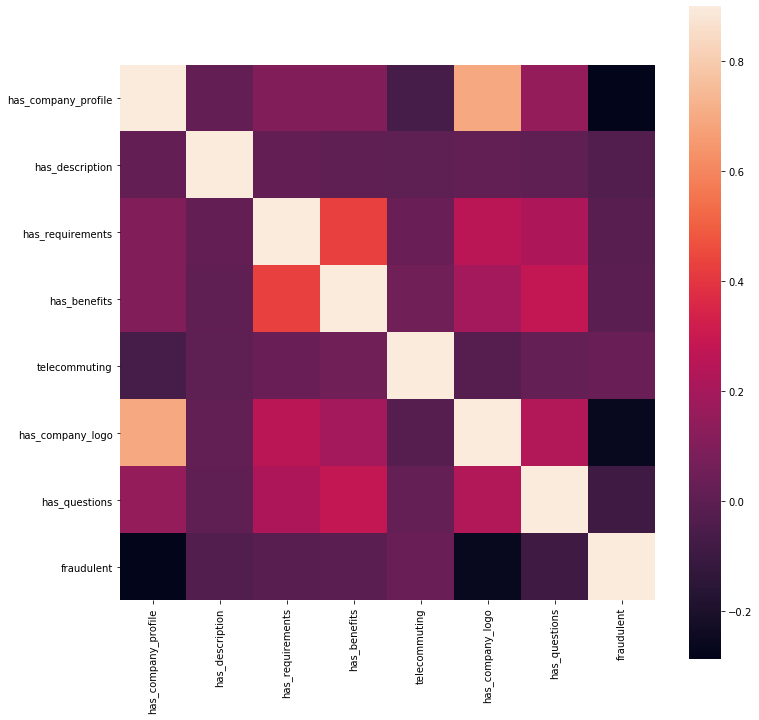

In [11]:
#Correlation map to see how features are correlated with price
corrmat = fake_job_postings_df.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=0.9, square=True)

From the correlation matrix above, we know that <b>telecommuting is the most correlated attributes to fraudulent.</b>

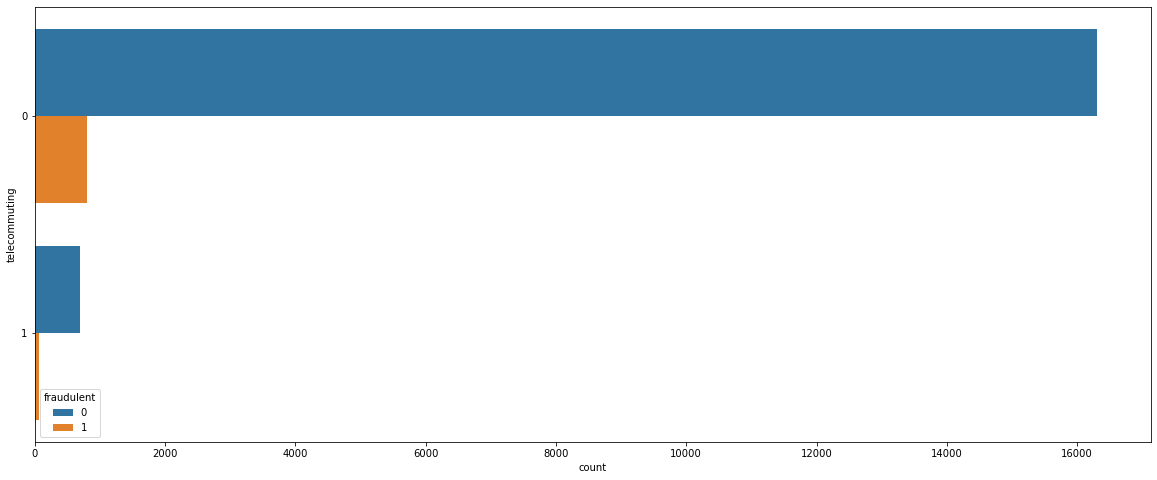

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(hue='fraudulent',y='telecommuting',data=fake_job_postings_df)
plt.show()

<b>From the graph above, we know that most fraud happen when there are no telecommuting positions.</b>

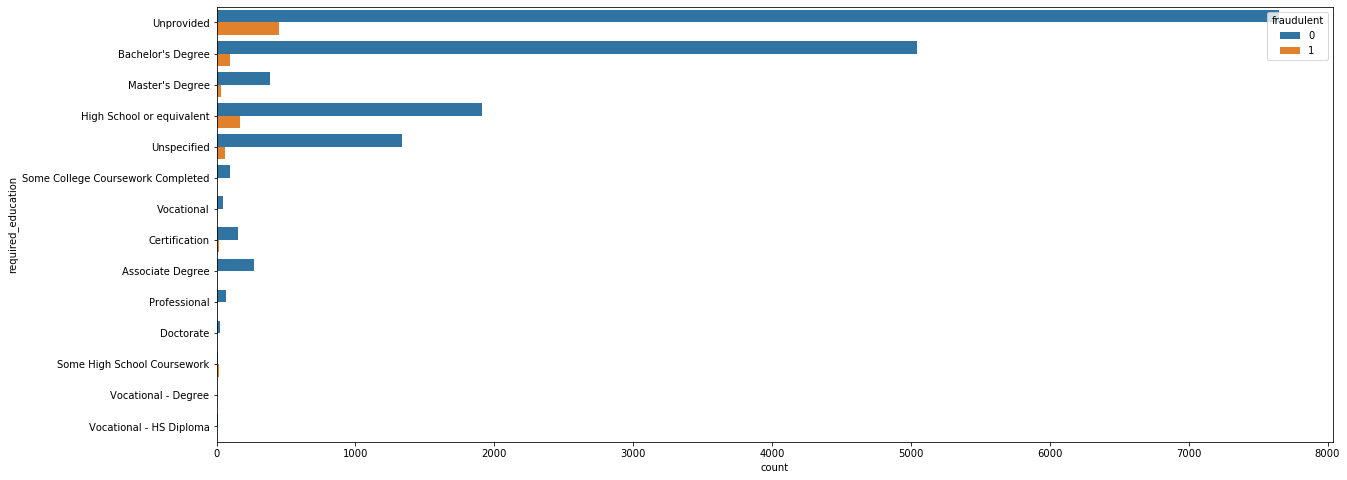

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(hue='fraudulent',y='required_education',data=fake_job_postings_df)
plt.show()

<b>From the graph above, we know that most fraud happen when there is no education required by the job postings.</b>

<h4 style="color:blue">Corona Patient</h4>
Since most of the attributes are categorical, we cant' use correlation matrix to see the correlation between feature data with target data.

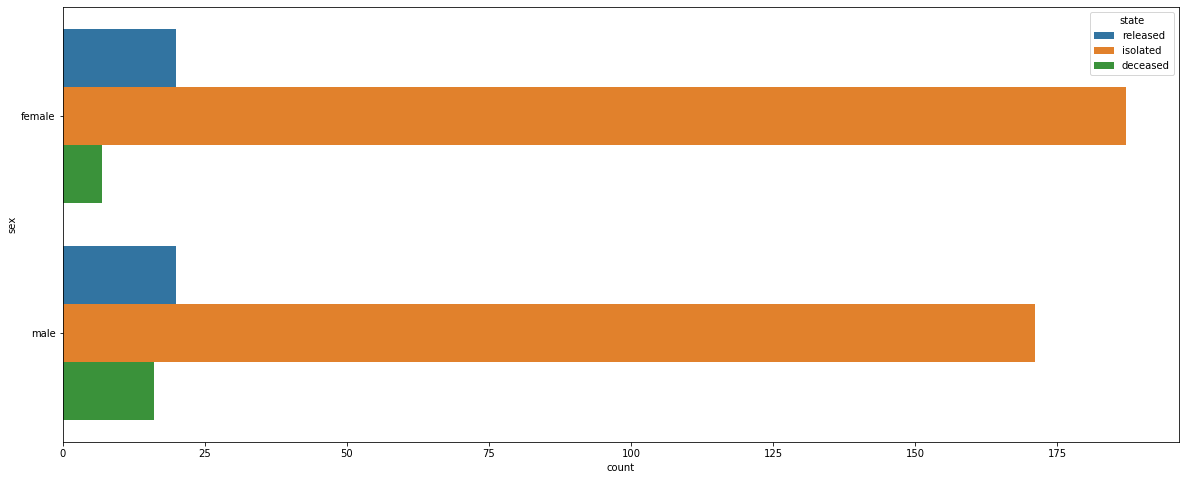

In [14]:
plt.figure(figsize=(20,8))
sns.countplot(hue='state',y='sex',data=corona_patient_df)
plt.show()

<b>From the graph above, we can conclude that corona viruses attack any gender, both male and female. Also, both genders don't have any particular DNA that will resist the viruses.</b>

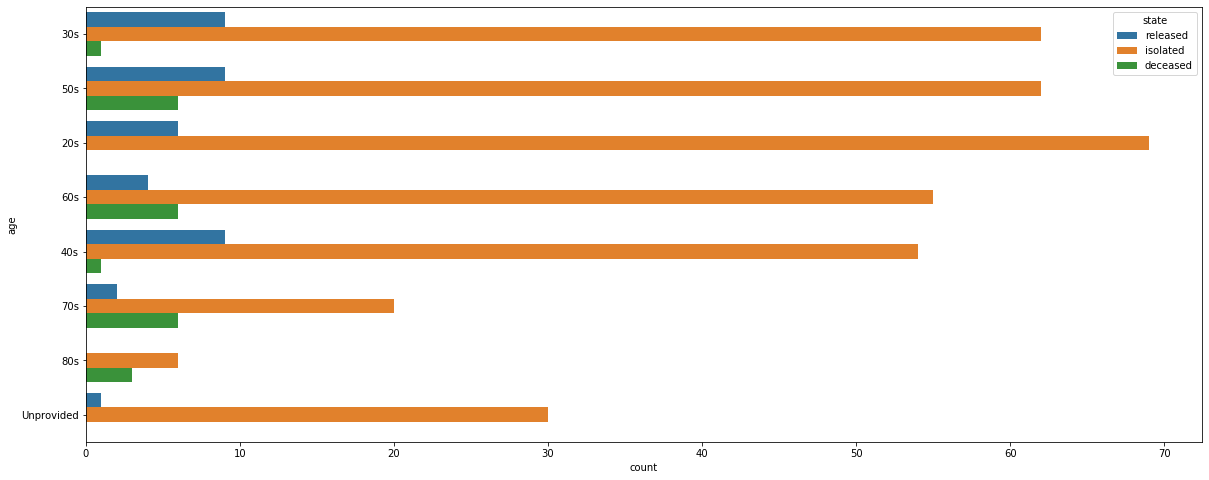

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(hue='state',y='age',data=corona_patient_df)
plt.show()

<b>From the graph above, we know that most death cases happen to elderly (50s - 80s). Most of the patients now are still isolated.</b>

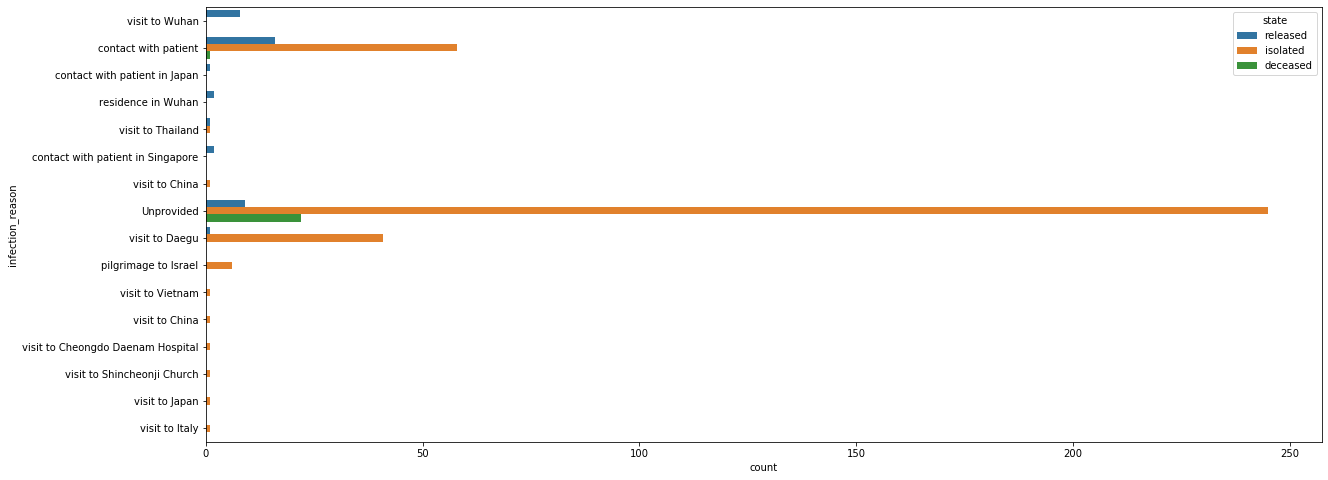

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(hue='state',y='infection_reason',data=corona_patient_df)
plt.show()

<b>From the graph above, we know that most people are infected after they have a contact with already infectec patient. And the other reason in unstated.</b>

<h3 style="color:#db4d69">Data Transformation for KNN</h3>
Since KNN Algorithm works by measuring how close two data points are in the feature space, the algorithm can't process string. In order for it to work properly, we need to encode features so that the algorithm can measure difference/distance. We will use label encoding since the value are nominal.

In [17]:
#creating labelEncoder
le = LabelEncoder()

# Converting string labels into numbers for Fake Job Postings Dataset
fake_job_postings_df['location']=le.fit_transform(fake_job_postings_df['location'])
fake_job_postings_df['salary_range']=le.fit_transform(fake_job_postings_df['salary_range'])
fake_job_postings_df['employment_type']=le.fit_transform(fake_job_postings_df['employment_type'])
fake_job_postings_df['required_experience']=le.fit_transform(fake_job_postings_df['required_experience'])
fake_job_postings_df['required_education']=le.fit_transform(fake_job_postings_df['required_education'])
fake_job_postings_df['industry']=le.fit_transform(fake_job_postings_df['industry'])
fake_job_postings_df['function']=le.fit_transform(fake_job_postings_df['function'])
display(fake_job_postings_df.head())

# Converting string labels into numbers for Fake Job Postings Dataset
corona_patient_df['sex']=le.fit_transform(corona_patient_df['sex'])
corona_patient_df['age']=le.fit_transform(corona_patient_df['age'])
corona_patient_df['region']=le.fit_transform(corona_patient_df['region'])
corona_patient_df['group']=le.fit_transform(corona_patient_df['group'])
corona_patient_df['infection_reason']=le.fit_transform(corona_patient_df['infection_reason'])
# corona_patient_df['infection_order']=le.fit_transform(corona_patient_df['infection_order'])
# corona_patient_df['infected_by']=le.fit_transform(corona_patient_df['infected_by'])
# corona_patient_df['contact_number']=le.fit_transform(corona_patient_df['contact_number'])
display(corona_patient_df.head())

,location,salary_range,has_company_profile,has_description,has_requirements,has_benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,2535,874,1,1,1,0,0,1,0,2,4,9,123,22,0
1,1073,874,1,1,1,1,0,1,0,1,6,9,75,7,0
2,1867,874,1,1,1,0,0,1,0,5,7,9,123,36,0
3,1703,874,1,1,1,1,0,1,0,1,5,1,22,31,0
4,1741,874,1,1,1,1,0,1,1,1,5,1,51,16,0


,sex,age,region,group,infection_reason,state
0,0,1,14,6,15,released
1,1,3,14,6,15,released
2,1,3,13,6,15,released
3,1,3,13,6,15,released
4,1,1,13,6,15,released



<h3 style="color:#db4d69">Split Feature Data and Target</h3>

In [18]:
# -------------------------------------------------- FAKE JOB POSTINGS --------------------------------------------------
# separate the feature data and target data
X_job = fake_job_postings_df.drop(columns=['fraudulent'])
y_job = fake_job_postings_df['fraudulent'].values

# split dataset into train and test data
# 'random_state’=1 ensures that we get the same split each time so we can reproduce our results.
# ‘stratify’ to y makes our training split represent the proportion of each value in the y variable.
# For example, in our dataset, if 25% of posts are fraudulent and 75% not fraudulent, setting ‘stratify’ to y
# will ensure that the random split has 25% of posts are fraudulent and 75% not fraudulent.
X_train_job, X_test_job, y_train_job, y_test_job = train_test_split(X_job, y_job, test_size=0.3, random_state=1, stratify=y_job)
display(X_train_job.head())
display(y_train_job)
display(X_test_job.head())
display(y_test_job)

# -------------------------------------------------- CORONA PATIENT --------------------------------------------------
# separate the feature data and target data
X_corona = corona_patient_df.drop(columns=['state'])
y_corona = corona_patient_df['state'].values

# split dataset into train and test data
X_train_corona, X_test_corona, y_train_corona, y_test_corona = train_test_split(X_corona, y_corona, test_size=0.3, random_state=1, stratify=y_corona)
display(X_train_corona.head())
display(y_train_corona[0:5])
display(X_test_corona.head())
display(y_test_corona[0:5])

,location,salary_range,has_company_profile,has_description,has_requirements,has_benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
2905,805,874,1,1,1,1,0,1,1,1,2,1,75,26
4246,2963,874,1,1,1,1,0,1,1,5,7,9,123,36
9052,872,874,1,1,1,1,0,1,1,1,2,9,58,1
5899,625,874,1,1,1,0,0,1,0,1,5,9,75,9
16346,2535,800,1,1,1,1,0,1,1,1,0,9,9,12


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

,location,salary_range,has_company_profile,has_description,has_requirements,has_benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
9339,954,874,1,1,1,1,0,1,1,1,7,9,58,18
7055,2042,874,0,1,1,0,0,0,0,5,7,1,123,36
8652,307,874,1,1,1,1,0,1,1,4,7,9,27,31
8411,2772,724,1,1,1,1,0,1,1,1,0,4,6,31
924,891,874,1,1,1,1,0,1,1,1,5,1,22,9


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

,sex,age,region,group,infection_reason
45,1,0,3,6,1
344,0,1,1,6,2
488,1,1,6,6,2
1246,1,0,13,5,9
64,0,3,3,6,1


array(['isolated', 'isolated', 'isolated', 'isolated', 'released'],
      dtype=object)

,sex,age,region,group,infection_reason
3299,0,7,13,6,1
1736,0,5,7,6,1
113,1,5,3,5,1
39,1,5,13,6,1
796,1,7,13,6,2


array(['isolated', 'isolated', 'deceased', 'isolated', 'isolated'],
      dtype=object)

<h3 style="color:#db4d69">KNN Algorithm</h3>

<h4>Create Classifier and Fit the Model</h4>

In [19]:
# Create KNN classifier
knn_job = KNeighborsClassifier(n_neighbors = 3)
knn_corona = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
display(knn_job.fit(X_train_job, y_train_job))
display(knn_corona.fit(X_train_corona, y_train_corona))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

<h4>Make Predictions</h4>

In [20]:
# predict using test data
job_pred = knn_job.predict(X_test_job)
corona_pred = knn_corona.predict(X_test_corona)
print('\033[1m' + "--------------------- Prediction Result ---------------------" + '\033[0m')
print('\033[1m' + "Fake Job Postings" + '\033[0m\n', job_pred[5:10])
print('\033[1m' + "Corona Dataset" + '\033[0m\n', corona_pred[0:5])

# check out the predictions and probabilities, which will provide insight into how close the vote was for each data point
print('\n\n\033[1m' + "--------------------- Prediction Probability ---------------------" + '\033[0m')
print('\033[1m' + "Fake Job Postings" + '\033[0m\n', knn_job.predict_proba(X_test_job)[5:10])
print('\033[1m' + "Corona Dataset" + '\033[0m\n', knn_corona.predict_proba(X_test_corona)[0:5])

--------------------- Prediction Result ---------------------
Fake Job Postings
 [0 0 0 0 0]
Corona Dataset
 ['isolated' 'isolated' 'deceased' 'isolated' 'isolated']


--------------------- Prediction Probability ---------------------
Fake Job Postings
 [[1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]]
Corona Dataset
 [[0.         1.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.66666667 0.33333333]]


Note that by looking at predict_proba(), we can tell how many of the surrounding neighbors were classified. <b>Since the n_neighbors was set to the default of 3, each “vote” is worth 0.33.</b>

In the <b>fake job postings dataset</b>, each point that was voted as [1. , 0. ] was a vote of 3-0 (3 nonfraudulent, 0 fraudulent). Each vote of [0.67, 0.33] was a vote of 2-1 (2 nonfraudulent, 1 fraudulent).

In the <b>corona dataset</b>, each point that was voted as [0. , 1. , 0. ] was a vote of 0-3-0 (0 deceased, 3 isolated, 0 released). Each vote of [0., 0.67, 0.33] was a vote of 0-2-1 (0 deceased, 2 isolated, 0 released).

<h4>Check Accuracy</h4>

In [21]:
# check accuracy of our model on the test data
knn_job_accuracy = knn_job.score(X_test_job, y_test_job)
knn_corona_accuracy = knn_corona.score(X_test_corona, y_test_corona)
print('\033[1m' + "---------------------------------------------- USING .SCORE ----------------------------------------------" + '\033[0m')
print("Model accuration for fake job postings dataset: ", knn_job_accuracy)
print("Model accuration for corona dataset: ", knn_corona_accuracy)

# .score and accuracy_score does the same job. Accuracy score will call
# .score takes the passed matrix X_test, calls predict and calls accuracy_score.
knn_job_accuracy = accuracy_score(y_test_job, job_pred)
knn_corona_accuracy = accuracy_score(y_test_corona, corona_pred)
print('\033[1m' + "---------------------------------------------- USING ACCURACY_SCORE ----------------------------------------------" + '\033[0m')
print("Model accuration for fake job postings dataset: ", knn_job_accuracy)
print("Model accuration for corona dataset: ", knn_corona_accuracy)
print('\n\n\033[1m' + "--------------------- FAKE JOB POSTINGS DATASET ---------------------" + '\033[0m')
print('\033[1m' + "Accuracy:" + '\033[0m', accuracy_score(y_test_job, job_pred))
print('\033[1m' + "Classification Report:" + '\033[0m\n', classification_report(y_test_job, job_pred))
print('\033[1m' + "Confusion Matrix:" + '\033[0m\n', confusion_matrix(y_test_job, job_pred))
print('\n\n\033[1m' + "--------------------- CORONA DATASET ---------------------" + '\033[0m')
print('\033[1m' + "Accuracy:" + '\033[0m', accuracy_score(y_test_corona, corona_pred))
print('\033[1m' + "Classification Report:" + '\033[0m\n', classification_report(y_test_corona, corona_pred))
print('\033[1m' + "Confusion Matrix:" + '\033[0m\n', confusion_matrix(y_test_corona, corona_pred))

---------------------------------------------- USING .SCORE ----------------------------------------------
Model accuration for fake job postings dataset:  0.9584265473527218
Model accuration for corona dataset:  0.8503937007874016
---------------------------------------------- USING ACCURACY_SCORE ----------------------------------------------
Model accuration for fake job postings dataset:  0.9584265473527218
Model accuration for corona dataset:  0.8503937007874016


--------------------- FAKE JOB POSTINGS DATASET ---------------------
Accuracy: 0.9584265473527218
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5104
           1       0.62      0.36      0.46       260

    accuracy                           0.96      5364
   macro avg       0.80      0.68      0.72      5364
weighted avg       0.95      0.96      0.95      5364

Confusion Matrix:
 [[5047   57]
 [ 166   94]]


--------------------- CORONA

<h4>Search for The Best Parameter</h4>
Source: https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

In [22]:
grid_params = {
    'n_neighbors':[3,5,11,19],            # 4 possibilities for n_neighbors
    'weights':['uniform','distance'],     # 2 possibilities for weights
    'metric':['euclidean','manhattan']    # 2 possibilities for metric
}

gs_job = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,                       # 3 cross-validations
    n_jobs = -1                   # telling the computer to use all of it’s processors to perform the model.
)

gs_corona = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,                       # 3 cross-validations
    n_jobs = -1                   # telling the computer to use all of it’s processors to perform the model.
)

gs_results_job = gs_job.fit(X_train_job, y_train_job)
gs_results_corona = gs_corona.fit(X_train_corona, y_train_corona)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.1s finished


In [23]:
print('\033[1m' + "--------------------- FAKE JOB POSTINGS DATASET ---------------------" + '\033[0m')
print('\033[1m' + "Best Score" + '\033[0m', gs_results_job.best_score_)
print('\033[1m' + "Best Estimator:" + '\033[0m\n', gs_results_job.best_estimator_)
print('\033[1m' + "Best Params:" + '\033[0m\n', gs_results_job.best_params_)
print('\n\n\033[1m' + "--------------------- CORONA DATASET ---------------------" + '\033[0m')
print('\033[1m' + "Best Score" + '\033[0m', gs_results_corona.best_score_)
print('\033[1m' + "Best Estimator:" + '\033[0m\n', gs_results_corona.best_estimator_)
print('\033[1m' + "Best Params:" + '\033[0m\n', gs_results_corona.best_params_)

--------------------- FAKE JOB POSTINGS DATASET ---------------------
Best Score 0.964765100671141
Best Estimator:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')
Best Params:
 {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


--------------------- CORONA DATASET ---------------------
Best Score 0.8945578231292517
Best Estimator:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='distance')
Best Params:
 {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


Grid search is an approach to <b>parameter tuning</b> that will methodically <b>build and evaluate a model</b> for each combination of algorithm parameters specified in a grid.

Based on grid search that we've done above, we know what is the best params of our KNN Classifier for fake job postings dataset and corona dataset each. Now, let's try the KNN algorithm with the best parameters and see the accuracy.

<h4>Improve Accuracy</h4>

<h5 style="color:blue">Fake Job Postings</h5>

In [24]:
# Create KNN classifier
knn_job = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

# Fit the classifier to the data
display(knn_job.fit(X_train_job, y_train_job))

# predict using test data
job_pred = knn_job.predict(X_test_job)

# check accuracy
print('\n\033[1m' + "--------------------- FAKE JOB POSTINGS DATASET ---------------------" + '\033[0m')
print('\033[1m' + "Accuracy:" + '\033[0m', accuracy_score(y_test_job, job_pred))
print('\033[1m' + "Classification Report:" + '\033[0m\n', classification_report(y_test_job, job_pred))
print('\033[1m' + "Confusion Matrix:" + '\033[0m\n', confusion_matrix(y_test_job, job_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')


--------------------- FAKE JOB POSTINGS DATASET ---------------------
Accuracy: 0.9666293810589113
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5104
           1       0.82      0.40      0.54       260

    accuracy                           0.97      5364
   macro avg       0.90      0.70      0.76      5364
weighted avg       0.96      0.97      0.96      5364

Confusion Matrix:
 [[5082   22]
 [ 157  103]]


<h5 style="color:blue">Corona Dataset</h5>

In [25]:
# Create KNN classifier
knn_corona = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='distance')

# Fit the classifier to the data
display(knn_corona.fit(X_train_corona, y_train_corona))

# predict using test data\
corona_pred = knn_corona.predict(X_test_corona)

# check accuracy
print('\n\033[1m' + "--------------------- CORONA DATASET ---------------------" + '\033[0m')
print('\033[1m' + "Accuracy:" + '\033[0m', accuracy_score(y_test_corona, corona_pred))
print('\033[1m' + "Classification Report:" + '\033[0m\n', classification_report(y_test_corona, corona_pred))
print('\033[1m' + "Confusion Matrix:" + '\033[0m\n', confusion_matrix(y_test_corona, corona_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='distance')


--------------------- CORONA DATASET ---------------------
Accuracy: 0.8503937007874016
Classification Report:
               precision    recall  f1-score   support

    deceased       0.60      0.43      0.50         7
    isolated       0.90      0.94      0.92       108
    released       0.33      0.25      0.29        12

    accuracy                           0.85       127
   macro avg       0.61      0.54      0.57       127
weighted avg       0.83      0.85      0.84       127

Confusion Matrix:
 [[  3   2   2]
 [  2 102   4]
 [  0   9   3]]


<h4>Analysis</h4>

The changes in parameters for KNeighborsClassifier is indeed resulting a better accuracy for Fake Job Postings Dataset (from 0.958 --> 0.966). But, for Corona Dataset, the accuracy is still the same (0.85). Instead, it decrease the precision for deceased label (from 0.75 --> 0.60)

<h3 style="color:#db4d69">Naive Bayes Algorithm</h3>

<h4 style="color:blue">Fake Job Postings</h4>

In [26]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train_job, y_train_job)

#Predict Output
expected = y_test_job
predicted = model.predict(X_test_job)

In [27]:
print('\033[1m' + "Accuracy:" + '\033[0m', accuracy_score(expected, predicted))
print('\033[1m' + "Classification Report:" + '\033[0m\n', classification_report(expected, predicted))
print('\033[1m' + "Confusion Matrix:" + '\033[0m\n', confusion_matrix(expected, predicted))

Accuracy: 0.9021252796420581
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      5104
           1       0.26      0.56      0.36       260

    accuracy                           0.90      5364
   macro avg       0.62      0.74      0.65      5364
weighted avg       0.94      0.90      0.92      5364

Confusion Matrix:
 [[4694  410]
 [ 115  145]]


<h4 style="color:blue">Corona Patient</h4>

In [28]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train_corona, y_train_corona)

#Predict Output
expected = y_test_corona
predicted = model.predict(X_test_corona)

In [29]:
print('\033[1m' + "Accuracy:" + '\033[0m', accuracy_score(expected, predicted))
print('\033[1m' + "Classification Report:" + '\033[0m\n', classification_report(expected, predicted))
print('\033[1m' + "Confusion Matrix:" + '\033[0m\n', confusion_matrix(expected, predicted))

Accuracy: 0.7559055118110236
Classification Report:
               precision    recall  f1-score   support

    deceased       0.33      0.57      0.42         7
    isolated       0.87      0.83      0.85       108
    released       0.17      0.17      0.17        12

    accuracy                           0.76       127
   macro avg       0.46      0.52      0.48       127
weighted avg       0.78      0.76      0.76       127

Confusion Matrix:
 [[ 4  3  0]
 [ 8 90 10]
 [ 0 10  2]]


<h3 style="color:#db4d69">Conclusion</h3>

From the accuracy shown above, I can tell that prediction using KNN algorithm is better than Naive Bayes algorithm for both fake job postings and corona dataset. But, in this case for the preprocessing I've done so far. Maybe if I evalute the preprocessing process, the result will be different.